In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import datawig 
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#intente usar datawig pero no pude ya que no es compatible con anaconda
#!git clone https://github.com/awslabs/datawig

In [3]:
#cd datawig

In [4]:
#pip install . --user

El siguiente dataset habla sobre accidentes de transito en el vamos a contar con 29 columnas que son hora, dia, ubicacion, cantidad de heridos / muertos tanto de ciclistas, motiristas o peatones como tambien informacion acerca de cual era el tipo de vehiculo que tuvo el accidente como tambien acerca de cuantos vehiculos estuvieron involucrados.


--------------------------------------------

Hipotesis:

¿Los accidentes de transito tienden a ocurrir con mayor frecuencia durante las horas pico?
¿los accidentes de transito tienden a ocurrir en areas urbanas grandes? 
¿tienen como resultado una mayor cantidad de muertes en hora pico que en otras horas?

-------------------------------------------------------------------------------------------------------------------------------------------

Limpieza de dataset - Feature Selection

In [75]:
data_accidentes=pd.read_csv('Motor_Vehicle_Collisions_-_Crashes.csv', delimiter=",");

C:\Users\Piero Nicolas\Documents\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3457: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [76]:
#controlo cantidad de registros que tiene el dataset
data_accidentes.shape

(2102132, 29)

In [77]:
#observo el dataset
data_accidentes.sample(5)

CRASH DATE CRASH TIME   BOROUGH ZIP CODE   LATITUDE  LONGITUDE  \
1041877  08/22/2016       9:10       NaN      NaN        NaN        NaN   
1687276  08/29/2013      16:00  BROOKLYN    11249  40.719740 -73.957821   
1964703  12/09/2022      22:41       NaN      NaN  40.764170 -73.839670   
1709949  08/03/2013      17:40  BROOKLYN  11228.0  40.615924 -74.004812   
344111   10/07/2019      17:00  BROOKLYN  11208.0  40.675297 -73.872680   

                          LOCATION                    ON STREET NAME  \
1041877                        NaN  QUEENSBORO BRIDGE UPPER            
1687276  (40.7197399, -73.9578209)  BERRY STREET                       
1964703      (40.76417, -73.83967)                    VAN WYCK EXPWY   
1709949  (40.6159236, -74.0048122)  15 AVENUE                          
344111      (40.675297, -73.87268)  PITKIN AVENUE                      

                        CROSS STREET NAME OFF STREET NAME  ...  \
1041877                               NaN             NaN  ...   
1687276  NORTH 9 STREET                               NaN  ...   
1964703                               NaN             NaN  ...   
1709949  78 STREET                                    NaN  ...   
344111                     DOSCHER STREET             NaN  ...   

         CONTRIBUTING FACTOR VEHICLE 2  CONTRIBUTING FACTOR VEHICLE 3  \
1041877                    Unspecified                            NaN   
1687276                    Unspecified                            NaN   
1964703                    Unspecified                            NaN   
1709949                    Unspecified                            NaN   
344111                     Unspecified                            NaN   

         CONTRIBUTING FACTOR VEHICLE 4  CONTRIBUTING FACTOR VEHICLE 5  \
1041877                            NaN                            NaN   
1687276                            NaN                            NaN   
1964703                            NaN                            NaN   
1709949                            NaN                            NaN   
344111                             NaN                            NaN   

         COLLISION_ID                  VEHICLE TYPE CODE 1  \
1041877       3504904                        Pick-up Truck   
1687276        200149        SPORT UTILITY / STATION WAGON   
1964703       4588789  Station Wagon/Sport Utility Vehicle   
1709949        124184                    PASSENGER VEHICLE   
344111        4234160                                 Taxi   

         VEHICLE TYPE CODE 2  VEHICLE TYPE CODE 3 VEHICLE TYPE CODE 4  \
1041877                Sedan                  NaN                 NaN   
1687276              BICYCLE                  NaN                 NaN   
1964703                   PK                  NaN                 NaN   
1709949              UNKNOWN                  NaN                 NaN   
344111                  Bike                  NaN                 NaN   

        VEHICLE TYPE CODE 5  
1041877                 NaN  
1687276                 NaN  
1964703                 NaN  
1709949                 NaN  
344111                  NaN  

[5 rows x 29 columns]

In [78]:
data_accidentes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2102132 entries, 0 to 2102131
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [81]:
data_accidentes.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'],
      dtype='object')

In [91]:
data_accidentes.isnull().sum()

CRASH DATE                             0
CRASH TIME                             0
BOROUGH                           653880
ZIP CODE                          654139
LATITUDE                          235426
LONGITUDE                         235426
LOCATION                          235426
ON STREET NAME                    448307
CROSS STREET NAME                 798104
OFF STREET NAME                  1746198
NUMBER OF PERSONS INJURED             18
NUMBER OF PERSONS KILLED              31
NUMBER OF PEDESTRIANS INJURED          0
NUMBER OF PEDESTRIANS KILLED           0
NUMBER OF CYCLIST INJURED              0
NUMBER OF CYCLIST KILLED               0
NUMBER OF MOTORIST INJURED             0
NUMBER OF MOTORIST KILLED              0
CONTRIBUTING FACTOR VEHICLE 1       6978
CONTRIBUTING FACTOR VEHICLE 2     327774
CONTRIBUTING FACTOR VEHICLE 3    1951468
CONTRIBUTING FACTOR VEHICLE 4    2068007
CONTRIBUTING FACTOR VEHICLE 5    2092872
COLLISION_ID                           0
VEHICLE TYPE COD

Elimino columnas que se consideran innecesarias 
No sirven porque requieren geolocalizacion y no se usara en el algoritmo
--------------------------------------------------------------------------
df1_accidentes=data_accidentes.drop("LOCATION",axis=1)
df1_accidentes=df1_accidentes.drop("LATITUDE",axis=1 )
df1_accidentes=df1_accidentes.drop("LONGITUDE",axis=1)
df1_accidentes=df1_accidentes.drop("COLLISION_ID",axis=1)

------------------------------------------------------------------------------------
Tienen muchos datos nulos y en la mayoria de los casos analizados no hay mas de 2 autos 

---------------------------------------------------------------
df1_accidentes=df1_accidentes.drop("CONTRIBUTING FACTOR VEHICLE 3",axis=1)
df1_accidentes=df1_accidentes.drop("CONTRIBUTING FACTOR VEHICLE 4",axis=1)
df1_accidentes=df1_accidentes.drop("CONTRIBUTING FACTOR VEHICLE 5",axis=1)
df1_accidentes=df1_accidentes.drop("OFF STREET NAME",axis=1)
df1_accidentes=df1_accidentes.drop("VEHICLE TYPE CODE 3",axis=1)
df1_accidentes=df1_accidentes.drop("VEHICLE TYPE CODE 4",axis=1)
df1_accidentes=df1_accidentes.drop("VEHICLE TYPE CODE 5",axis=1)

In [102]:
df1_accidentes=data_accidentes.drop("LOCATION",axis=1)
df1_accidentes=df1_accidentes.drop("LATITUDE",axis=1 )
df1_accidentes=df1_accidentes.drop("LONGITUDE",axis=1)
df1_accidentes=df1_accidentes.drop("COLLISION_ID",axis=1)

df1_accidentes=df1_accidentes.drop("CONTRIBUTING FACTOR VEHICLE 3",axis=1)
df1_accidentes=df1_accidentes.drop("CONTRIBUTING FACTOR VEHICLE 4",axis=1)
df1_accidentes=df1_accidentes.drop("CONTRIBUTING FACTOR VEHICLE 5",axis=1)
df1_accidentes=df1_accidentes.drop("OFF STREET NAME",axis=1)

df1_accidentes=df1_accidentes.drop("VEHICLE TYPE CODE 3",axis=1)
df1_accidentes=df1_accidentes.drop("VEHICLE TYPE CODE 4",axis=1)
df1_accidentes=df1_accidentes.drop("VEHICLE TYPE CODE 5",axis=1)

In [112]:
df1_accidentes

CRASH DATE CRASH TIME    BOROUGH ZIP CODE           ON STREET NAME  \
0        09/11/2021       2:39        NaN      NaN    WHITESTONE EXPRESSWAY   
1        03/26/2022      11:45        NaN      NaN  QUEENSBORO BRIDGE UPPER   
2        06/29/2022       6:55        NaN      NaN       THROGS NECK BRIDGE   
3        09/11/2021       9:35   BROOKLYN  11208.0                      NaN   
4        12/14/2021       8:13   BROOKLYN  11233.0          SARATOGA AVENUE   
...             ...        ...        ...      ...                      ...   
2102127  07/06/2024      13:44   BROOKLYN  11207.0                      NaN   
2102128  07/05/2024      14:40   BROOKLYN  11234.0                      NaN   
2102129  07/04/2024       0:30   BROOKLYN  11209.0                      NaN   
2102130  07/04/2024      22:21  MANHATTAN  10012.0           KENMARE STREET   
2102131  07/06/2024       0:09   BROOKLYN  11222.0            MORGAN AVENUE   

         CROSS STREET NAME  NUMBER OF PERSONS INJURED  \
0                20 AVENUE                        2.0   
1                      NaN                        1.0   
2                      NaN                        0.0   
3                      NaN                        0.0   
4           DECATUR STREET                        0.0   
...                    ...                        ...   
2102127                NaN                        0.0   
2102128                NaN                        0.0   
2102129                NaN                        0.0   
2102130             BOWERY                        1.0   
2102131  RICHARDSON STREET                        1.0   

         NUMBER OF PERSONS KILLED  NUMBER OF PEDESTRIANS INJURED  \
0                             0.0                              0   
1                             0.0                              0   
2                             0.0                              0   
3                             0.0                              0   
4                             0.0                              0   
...                           ...                            ...   
2102127                       0.0                              0   
2102128                       0.0                              0   
2102129                       0.0                              0   
2102130                       0.0                              1   
2102131                       0.0                              0   

         NUMBER OF PEDESTRIANS KILLED  NUMBER OF CYCLIST INJURED  \
0                                   0                          0   
1                                   0                          0   
2                                   0                          0   
3                                   0                          0   
4                                   0                          0   
...                               ...                        ...   
2102127                             0                          0   
2102128                             0                          0   
2102129                             0                          0   
2102130                             0                          0   
2102131                             0                          0   

         NUMBER OF CYCLIST KILLED  NUMBER OF MOTORIST INJURED  \
0                               0                           2   
1                               0                           1   
2                               0                           0   
3                               0                           0   
4                               0                           0   
...                           ...                         ...   
2102127                         0                           0   
2102128                         0                           0   
2102129                         0                           0   
2102130                         0                           0   
2102131                   

In [113]:
df1_accidentes.shape

(2102132, 18)

Realizo reemplazo de los nan 

In [114]:
df1_accidentes.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          653880
ZIP CODE                         654139
ON STREET NAME                   448307
CROSS STREET NAME                798104
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1      6978
CONTRIBUTING FACTOR VEHICLE 2    327774
VEHICLE TYPE CODE 1               14107
VEHICLE TYPE CODE 2              405376
dtype: int64

Analizo los valores de las columnas para determinar como 

In [115]:
df1_accidentes['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                       713290
Driver Inattention/Distraction    421866
Failure to Yield Right-of-Way     125059
Following Too Closely             112610
Backing Unsafely                   77537
                                   ...  
Windshield Inadequate                 82
Cell Phone (hand-held)                79
Texting                               53
Listening/Using Headphones            26
1                                     10
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

In [116]:
df1_accidentes['CONTRIBUTING FACTOR VEHICLE 2'].value_counts()

Unspecified                       1493923
Driver Inattention/Distraction      95412
Other Vehicular                     32395
Following Too Closely               19353
Failure to Yield Right-of-Way       17305
                                   ...   
Eating or Drinking                     12
Listening/Using Headphones             12
Windshield Inadequate                   7
1                                       5
Texting                                 3
Name: CONTRIBUTING FACTOR VEHICLE 2, Length: 61, dtype: int64

In [117]:
df1_accidentes['VEHICLE TYPE CODE 1'].value_counts()

Sedan                                  588477
Station Wagon/Sport Utility Vehicle    462852
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    52291
                                        ...  
moter                                       1
Hrse                                        1
Trl                                         1
U-Hau                                       1
City Bus                                    1
Name: VEHICLE TYPE CODE 1, Length: 1677, dtype: int64

In [118]:
df1_accidentes['VEHICLE TYPE CODE 2'].value_counts()

Sedan                                  410513
Station Wagon/Sport Utility Vehicle    331999
PASSENGER VEHICLE                      318607
SPORT UTILITY / STATION WAGON          140204
UNKNOWN                                 81515
                                        ...  
CONT                                        1
ORANGE JLG                                  1
dirtbike                                    1
conta                                       1
REG.AMBULA                                  1
Name: VEHICLE TYPE CODE 2, Length: 1863, dtype: int64

In [119]:
df1_accidentes['BOROUGH'].value_counts()

BROOKLYN         461234
QUEENS           388403
MANHATTAN        323588
BRONX            214243
STATEN ISLAND     60784
Name: BOROUGH, dtype: int64

In [120]:
df1_accidentes['ZIP CODE'].value_counts()

11207.0    21208
11236.0    15182
11234.0    13843
11203.0    13799
11385.0    13761
           ...  
10153          1
11241.0        1
10120          1
10162.0        1
11371.0        1
Name: ZIP CODE, Length: 427, dtype: int64

In [121]:
df1_accidentes['ON STREET NAME'].value_counts()

BROADWAY                            17277
ATLANTIC AVENUE                     15322
BELT PARKWAY                        13543
3 AVENUE                            12476
NORTHERN BOULEVARD                  11965
                                    ...  
34TH STREET                             1
hugh j grant cir                        1
Ed Koch Queensborough Bridge            1
86 street                               1
BEACON PLACE                            1
Name: ON STREET NAME, Length: 18537, dtype: int64

In [122]:
df1_accidentes['CROSS STREET NAME'].value_counts()

3 AVENUE                            9843
BROADWAY                            9685
2 AVENUE                            8421
5 AVENUE                            7051
3 AVENUE                            6903
                                    ... 
SWEETGUM LANE                          1
gentile court                          1
seventh avenue                         1
Ford Street                            1
Avenue Z                               1
Name: CROSS STREET NAME, Length: 20295, dtype: int64

Se asume que si el dato no existe, no aplica, por lo que se toma la moda de los datos que es ("Unspecified")

In [123]:
df1_accidentes['CONTRIBUTING FACTOR VEHICLE 1'] = df1_accidentes['CONTRIBUTING FACTOR VEHICLE 2'].fillna("Unspecified")

In [124]:
df1_accidentes['CONTRIBUTING FACTOR VEHICLE 1'].isnull().sum()

0

In [125]:
df1_accidentes['CONTRIBUTING FACTOR VEHICLE 2'] = df1_accidentes['CONTRIBUTING FACTOR VEHICLE 2'].fillna("Unspecified")

In [126]:
df1_accidentes['CONTRIBUTING FACTOR VEHICLE 2'].isnull().sum()

0

In [127]:
df1_accidentes.isnull().sum()

CRASH DATE                            0
CRASH TIME                            0
BOROUGH                          653880
ZIP CODE                         654139
ON STREET NAME                   448307
CROSS STREET NAME                798104
NUMBER OF PERSONS INJURED            18
NUMBER OF PERSONS KILLED             31
NUMBER OF PEDESTRIANS INJURED         0
NUMBER OF PEDESTRIANS KILLED          0
NUMBER OF CYCLIST INJURED             0
NUMBER OF CYCLIST KILLED              0
NUMBER OF MOTORIST INJURED            0
NUMBER OF MOTORIST KILLED             0
CONTRIBUTING FACTOR VEHICLE 1         0
CONTRIBUTING FACTOR VEHICLE 2         0
VEHICLE TYPE CODE 1               14107
VEHICLE TYPE CODE 2              405376
dtype: int64

Para el resto de los datos se tomara el dato que sea la moda, con excepcion de heridos y muertes

In [128]:
valores=df1_accidentes.values
valores

array([['09/11/2021', '2:39', nan, ..., 'Unspecified', 'Sedan', 'Sedan'],
       ['03/26/2022', '11:45', nan, ..., 'Unspecified', 'Sedan', nan],
       ['06/29/2022', '6:55', nan, ..., 'Unspecified', 'Sedan',
        'Pick-up Truck'],
       ...,
       ['07/04/2024', '0:30', 'BROOKLYN', ..., 'Unspecified',
        'Station Wagon/Sport Utility Vehicle', 'Moped'],
       ['07/04/2024', '22:21', 'MANHATTAN', ..., 'Unspecified', 'Sedan',
        nan],
       ['07/06/2024', '0:09', 'BROOKLYN', ..., 'Unspecified',
        'Station Wagon/Sport Utility Vehicle', 'Sedan']], dtype=object)

In [129]:
imputador = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [130]:
transformados = imputador.fit_transform(valores)

In [131]:
transformados=pd.DataFrame(transformados)

In [132]:
transformados.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [133]:
transformados.sample(5)

0      1         2        3   \
1289779  08/06/2015  16:50    QUEENS  11691.0   
185451   01/11/2021  13:00  BROOKLYN  11238.0   
954391   01/19/2017  17:48  BROOKLYN  11207.0   
826332   07/29/2017   2:20  BROOKLYN  11205.0   
1265844  09/13/2015  13:00  BROOKLYN  11206.0   

                                       4                                 5   \
1289779  BEACH 22 STREET                   MOTT AVENUE                        
185451   GATES AVENUE                                          IRVING PLACE   
954391   JEROME AVENUE                     3 AVENUE                           
826332   BROADWAY                          3 AVENUE                           
1265844  BUSHWICK AVENUE                   VARET STREET                       

          6    7  8  9  10 11 12 13           14           15  \
1289779  1.0  0.0  1  0  0  0  0  0  Unspecified  Unspecified   
185451   0.0  0.0  0  0  0  0  0  0  Unspecified  Unspecified   
954391   0.0  0.0  0  0  0  0  0  0  Unspecified  Unspecified   
826332   0.0  0.0  0  0  0  0  0  0  Unspecified  Unspecified   
1265844  1.0  0.0  0  0  0  0  1  0  Unspecified  Unspecified   

                                          16                             17  
1289779                              UNKNOWN                          Sedan  
185451   Station Wagon/Sport Utility Vehicle                          Sedan  
954391   Station Wagon/Sport Utility Vehicle                          Sedan  
826332                                 Sedan                          Sedan  
1265844                    PASSENGER VEHICLE  SPORT UTILITY / STATION WAGON

In [134]:
df1_accidentes['BOROUGH'] = transformados[2]

In [135]:
df1_accidentes['ZIP CODE'] = transformados[3]

In [136]:
df1_accidentes['ON STREET NAME'] = transformados[4]

In [137]:
df1_accidentes['CROSS STREET NAME'] = transformados[5]

In [138]:
df1_accidentes['VEHICLE TYPE CODE 1'] = transformados[16]

In [139]:
df1_accidentes['VEHICLE TYPE CODE 2'] = transformados[17]

In [140]:
df1_accidentes.isnull().sum()

CRASH DATE                        0
CRASH TIME                        0
BOROUGH                           0
ZIP CODE                          0
ON STREET NAME                    0
CROSS STREET NAME                 0
NUMBER OF PERSONS INJURED        18
NUMBER OF PERSONS KILLED         31
NUMBER OF PEDESTRIANS INJURED     0
NUMBER OF PEDESTRIANS KILLED      0
NUMBER OF CYCLIST INJURED         0
NUMBER OF CYCLIST KILLED          0
NUMBER OF MOTORIST INJURED        0
NUMBER OF MOTORIST KILLED         0
CONTRIBUTING FACTOR VEHICLE 1     0
CONTRIBUTING FACTOR VEHICLE 2     0
VEHICLE TYPE CODE 1               0
VEHICLE TYPE CODE 2               0
dtype: int64

para las columnas restantes se eliminan las filas ya que representan un porcentaje muy chico del dataset

In [141]:
df1_accidentes.dropna(inplace = True)

In [142]:
df1_accidentes.isnull().sum()

CRASH DATE                       0
CRASH TIME                       0
BOROUGH                          0
ZIP CODE                         0
ON STREET NAME                   0
CROSS STREET NAME                0
NUMBER OF PERSONS INJURED        0
NUMBER OF PERSONS KILLED         0
NUMBER OF PEDESTRIANS INJURED    0
NUMBER OF PEDESTRIANS KILLED     0
NUMBER OF CYCLIST INJURED        0
NUMBER OF CYCLIST KILLED         0
NUMBER OF MOTORIST INJURED       0
NUMBER OF MOTORIST KILLED        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
dtype: int64

termino con la limpieza de datos nulos, verifico la cantidad de registros

In [143]:
df1_accidentes.shape

(2102095, 18)

In [145]:
df2_accidentes=df1_accidentes

In [146]:
#se comenta la linea ya que se hizo reemplazo de nulos por inputacion de datos 
#df2_accidentes=df1_accidentes.dropna()

----------------------------------------------------------------

se define periodo del dia para analizar si hay relacion entre hora y periodo de dia y alguna otra variable

In [147]:
def definir_periodo(x):
    if x>=0 and x<=6:
        return "madrugada"
    if x>6 and x<=12:
        return "mañana"
    if x>12 and x<=18:
        return "tarde"
    if x>18 and x<=23:
        return "noche"

In [148]:
df2_accidentes['hora'] = df2_accidentes['CRASH TIME'].apply(lambda x: pd.to_numeric(x.split(":")[0])) 
df2_accidentes['hora'].dtype

dtype('int64')

In [149]:
df2_accidentes['periodo_dia'] = df2_accidentes['hora'].apply(lambda x: definir_periodo(x)) 
df2_accidentes

CRASH DATE CRASH TIME    BOROUGH ZIP CODE  \
0        09/11/2021       2:39   BROOKLYN  11207.0   
1        03/26/2022      11:45   BROOKLYN  11207.0   
2        06/29/2022       6:55   BROOKLYN  11207.0   
3        09/11/2021       9:35   BROOKLYN  11208.0   
4        12/14/2021       8:13   BROOKLYN  11233.0   
...             ...        ...        ...      ...   
2102127  07/06/2024      13:44   BROOKLYN  11207.0   
2102128  07/05/2024      14:40   BROOKLYN  11234.0   
2102129  07/04/2024       0:30   BROOKLYN  11209.0   
2102130  07/04/2024      22:21  MANHATTAN  10012.0   
2102131  07/06/2024       0:09   BROOKLYN  11222.0   

                           ON STREET NAME                 CROSS STREET NAME  \
0                   WHITESTONE EXPRESSWAY                         20 AVENUE   
1                 QUEENSBORO BRIDGE UPPER  3 AVENUE                           
2                      THROGS NECK BRIDGE  3 AVENUE                           
3        BROADWAY                          3 AVENUE                           
4                         SARATOGA AVENUE                    DECATUR STREET   
...                                   ...                               ...   
2102127  BROADWAY                          3 AVENUE                           
2102128  BROADWAY                          3 AVENUE                           
2102129  BROADWAY                          3 AVENUE                           
2102130                    KENMARE STREET                            BOWERY   
2102131                     MORGAN AVENUE                 RICHARDSON STREET   

         NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
0                              2.0                       0.0   
1                              1.0                       0.0   
2                              0.0                       0.0   
3                              0.0                       0.0   
4                              0.0                       0.0   
...                            ...                       ...   
2102127                        0.0                       0.0   
2102128                        0.0                       0.0   
2102129                        0.0                       0.0   
2102130                        1.0                       0.0   
2102131                        1.0                       0.0   

         NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
2102127                              0                             0   
2102128                              0                             0   
2102129                              0                             0   
2102130                              1                             0   
2102131                              0                             0   

         NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
0                                0                         0   
1                                0                         0   
2                                0                         0   
3                                0                         0   
4                                0                         0   
...                            ...                       ...   
2102127                          0                         0   
2102128                          0                         0   
2102129                          0                         0   
2102130                          0                         0   
2102131                          0                         0   

        

In [150]:
df2_accidentes["NUMBER OF PERSONS KILLED"].value_counts()

0.0    2099042
1.0       2957
2.0         77
3.0         13
4.0          3
5.0          2
8.0          1
Name: NUMBER OF PERSONS KILLED, dtype: int64

In [151]:
y=df2_accidentes.groupby(by="BOROUGH").sum()
y
#y.value_counts()

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
BOROUGH                                                              
BRONX                            70857.0                     284.0   
BROOKLYN                        383208.0                    1919.0   
MANHATTAN                        69003.0                     342.0   
QUEENS                          118193.0                     539.0   
STATEN ISLAND                    17482.0                      96.0   

               NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
BOROUGH                                                                      
BRONX                                  15866                           138   
BROOKLYN                               56800                           871   
MANHATTAN                              21734                           244   
QUEENS                                 22805                           285   
STATEN ISLAND                           2621                            39   

               NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
BOROUGH                                                              
BRONX                               4641                        25   
BROOKLYN                           30237                       142   
MANHATTAN                          13143                        40   
QUEENS                              8628                        35   
STATEN ISLAND                        526                         4   

               NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED      hora  
BOROUGH                                                                         
BRONX                               49357                        112   2820533  
BROOKLYN                           291668                        876  14670681  
MANHATTAN                           33188                         53   4287410  
QUEENS                              85189                        214   5147459  
STATEN ISLAND                       14266                         52    822323

In [152]:
y4=df2_accidentes.groupby(by="CRASH TIME").count()
y4

CRASH DATE  BOROUGH  ZIP CODE  ON STREET NAME  CROSS STREET NAME  \
CRASH TIME                                                                     
0:00             21209    21209     21209           21209              21209   
0:01              2579     2579      2579            2579               2579   
0:02               550      550       550             550                550   
0:03               379      379       379             379                379   
0:04               368      368       368             368                368   
...                ...      ...       ...             ...                ...   
9:55              2697     2697      2697            2697               2697   
9:56               516      516       516             516                516   
9:57               528      528       528             528                528   
9:58               623      623       623             623                623   
9:59               345      345       345             345                345   

            NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
CRASH TIME                                                        
0:00                            21209                     21209   
0:01                             2579                      2579   
0:02                              550                       550   
0:03                              379                       379   
0:04                              368                       368   
...                               ...                       ...   
9:55                             2697                      2697   
9:56                              516                       516   
9:57                              528                       528   
9:58                              623                       623   
9:59                              345                       345   

            NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
CRASH TIME                                                                
0:00                                21209                         21209   
0:01                                 2579                          2579   
0:02                                  550                           550   
0:03                                  379                           379   
0:04                                  368                           368   
...                                   ...                           ...   
9:55                                 2697                          2697   
9:56                                  516                           516   
9:57                                  528                           528   
9:58                                  623                           623   
9:59                                  345                           345   

            NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
CRASH TIME                                                        
0:00                            21209                     21209   
0:01                             2579                      2579   
0:02                              550                       550   
0:03                              379                       379   
0:04                              368                       368   
...                               ...                       ...   
9:55                             2697                      2697   
9:56                              516                       516   
9:57                              528                       528   
9:58                              623                       623   
9:59                              345                       345   

            NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
CRASH TIME                                                          
0:00                             21209                      21209   
0:01                              2579      

In [153]:
df3_accidentes=df2_accidentes.groupby(by="BOROUGH").sum()
df3_accidentes

NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
BOROUGH                                                              
BRONX                            70857.0                     284.0   
BROOKLYN                        383208.0                    1919.0   
MANHATTAN                        69003.0                     342.0   
QUEENS                          118193.0                     539.0   
STATEN ISLAND                    17482.0                      96.0   

               NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
BOROUGH                                                                      
BRONX                                  15866                           138   
BROOKLYN                               56800                           871   
MANHATTAN                              21734                           244   
QUEENS                                 22805                           285   
STATEN ISLAND                           2621                            39   

               NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
BOROUGH                                                              
BRONX                               4641                        25   
BROOKLYN                           30237                       142   
MANHATTAN                          13143                        40   
QUEENS                              8628                        35   
STATEN ISLAND                        526                         4   

               NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED      hora  
BOROUGH                                                                         
BRONX                               49357                        112   2820533  
BROOKLYN                           291668                        876  14670681  
MANHATTAN                           33188                         53   4287410  
QUEENS                              85189                        214   5147459  
STATEN ISLAND                       14266                         52    822323

In [154]:
x=df3_accidentes.index
x

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='BOROUGH')

In [155]:
y=df3_accidentes["NUMBER OF PERSONS KILLED"]
y

BOROUGH
BRONX             284.0
BROOKLYN         1919.0
MANHATTAN         342.0
QUEENS            539.0
STATEN ISLAND      96.0
Name: NUMBER OF PERSONS KILLED, dtype: float64

Se analiza si hay mas muertes por ciudad.

Text(0, 0.5, 'NUMBER OF PERSONS KILLED')

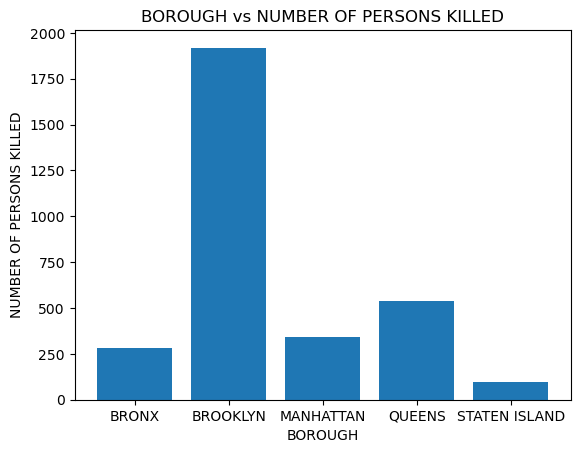

In [156]:
fig, ax = plt.subplots()
ax.bar(x,y)
ax.set_title('BOROUGH vs NUMBER OF PERSONS KILLED')
ax.set_xlabel('BOROUGH')
ax.set_ylabel('NUMBER OF PERSONS KILLED')

En este grafico se busca observar en que localidad hay mas accidentes con personas muertas, dando como resultado que en Brooklyn es en donde ocurren.

In [157]:
x1=df3_accidentes.index
x1

Index(['BRONX', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'], dtype='object', name='BOROUGH')

In [158]:
y1=df3_accidentes["NUMBER OF PERSONS INJURED"]
y1

BOROUGH
BRONX             70857.0
BROOKLYN         383208.0
MANHATTAN         69003.0
QUEENS           118193.0
STATEN ISLAND     17482.0
Name: NUMBER OF PERSONS INJURED, dtype: float64

Se analiza si hay mas heridos por ciudad.

Text(0, 0.5, 'NUMBER OF PERSONS INJURED')

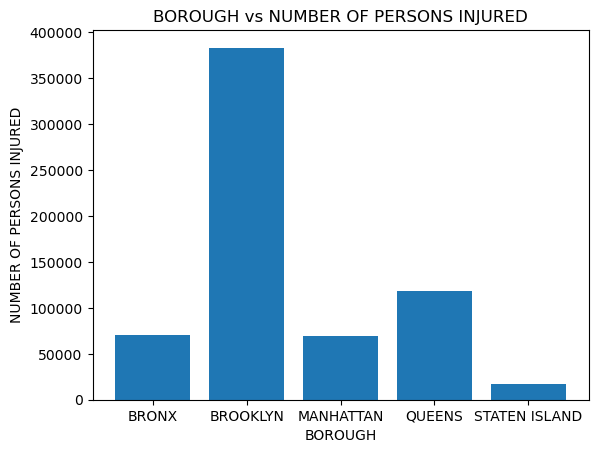

In [159]:
fig, ax = plt.subplots()
ax.bar(x1,y1)
ax.set_title("BOROUGH vs NUMBER OF PERSONS INJURED")
ax.set_xlabel('BOROUGH')
ax.set_ylabel('NUMBER OF PERSONS INJURED')

En este grafico se busca observar en que localidad hay mas accidentes con personas heridas, es en brookyln donde hay mas accidentes con personas heridas

In [160]:
muertes_peatones=df2_accidentes['NUMBER OF PEDESTRIANS KILLED'].sum()
muertes_peatones

1577

In [161]:
muertes_ciclista=df2_accidentes["NUMBER OF CYCLIST KILLED"].sum()
muertes_ciclista

246

In [162]:
muertes_motos=df2_accidentes["NUMBER OF MOTORIST KILLED"].sum()
muertes_motos 

1307

In [163]:
muertes_peatones
muertes_ciclista
muertes_motos

1307

In [164]:
x_torta = ['peatones','ciclistas','motoristas']
y_torta = [muertes_peatones,muertes_ciclista,muertes_motos]
y_torta

[1577, 246, 1307]

Se analiza la cantidad de muertes tanto de peatones, ciclistas y conductores.

([<matplotlib.patches.Wedge at 0x2bfad583e80>,
 [Text(-0.01324865225380201, 1.099920212203348, 'peatones'),
  Text(-1.059854002151091, -0.29446475871369643, 'ciclistas'),
  Text(0.28167832502911794, -1.0633237142134988, 'motoristas')])

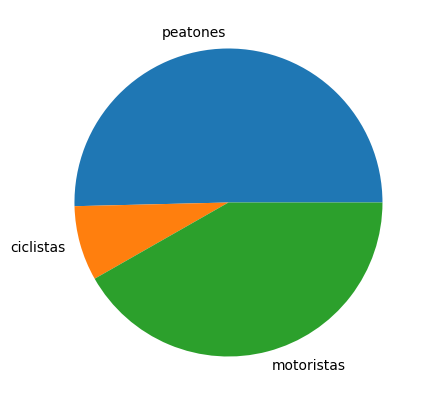

In [165]:
fig,ax = plt.subplots(figsize =(15, 5))
ax.pie(y_torta, labels=x_torta, )

con el grafico de torta podemos observar que hay mas cantidad de peatones muertos


In [166]:
heridos_peatones=df2_accidentes['NUMBER OF PEDESTRIANS INJURED'].sum()
heridos_peatones

119826

In [167]:
heridos_ciclistas=df2_accidentes['NUMBER OF CYCLIST INJURED'].sum()
heridos_ciclistas

57175

In [168]:
heridos_motos=df2_accidentes['NUMBER OF MOTORIST INJURED'].sum()
heridos_motos

473668

In [169]:
heridos_peatones
heridos_ciclistas
heridos_motos
muertes_peatones
muertes_ciclista
muertes_motos

1307

In [170]:
x_torta2 = ['peatones','ciclistas','motoristas']
y_torta2 = [heridos_peatones,heridos_ciclistas,heridos_motos]
y_torta2

[119826, 57175, 473668]


Se analiza la cantidad de heridos tanto de peatones, ciclistas y conductores.

([<matplotlib.patches.Wedge at 0x2bfac33c190>,
 [Text(0.9209821178323125, 0.6014914285616285, 'peatones'),
  Text(0.15092789781518953, 1.0895966086864843, 'ciclistas'),
  Text(-0.7221680469031716, -0.8297429192418931, 'motoristas')])

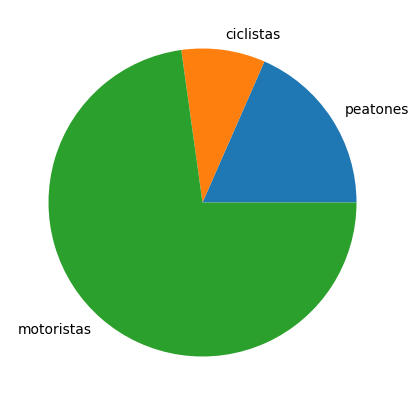

In [171]:
fig,ax = plt.subplots(figsize =(10, 5))
ax.pie(y_torta2, labels=x_torta2, )

Con este grafico podemos observar que hay mas cantidad de heridos motoristas

Se analiza en que horario y localidad hubo mas heridos.

<AxesSubplot:xlabel='hora', ylabel='NUMBER OF MOTORIST INJURED'>

C:\Users\Piero Nicolas\Documents\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


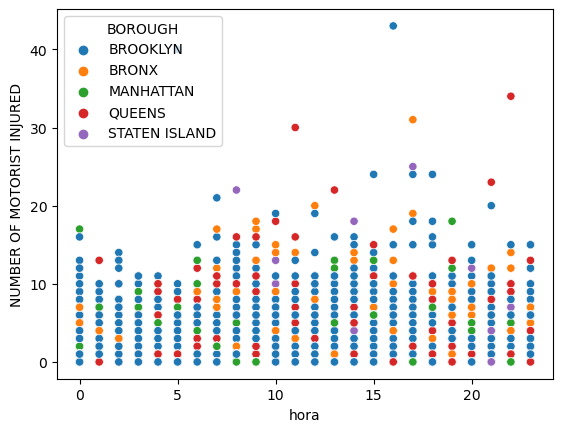

In [172]:
sns.scatterplot(data=df2_accidentes, x="hora", y="NUMBER OF MOTORIST INJURED", hue="BOROUGH")

Se analiza distrubucion y varianza de las personas heridas por periodo de dia

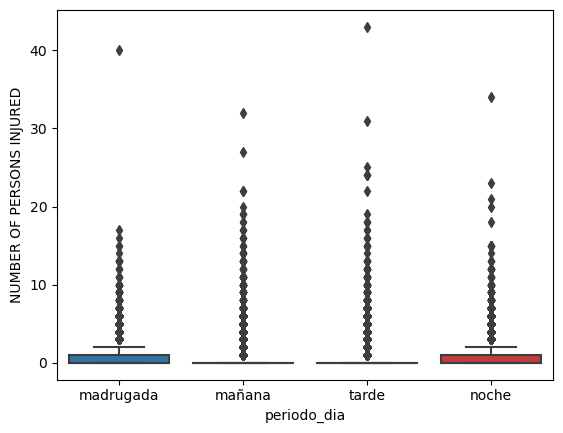

In [173]:
ax = sns.boxplot(x="periodo_dia", y="NUMBER OF PERSONS INJURED", data=df2_accidentes)

In [174]:
total_heridos=df2_accidentes['NUMBER OF PEDESTRIANS INJURED']+df2_accidentes['NUMBER OF PEDESTRIANS KILLED']
total_heridos

0          0
1          0
2          0
3          0
4          0
          ..
2102127    0
2102128    0
2102129    0
2102130    1
2102131    0
Length: 2102095, dtype: int64

In [175]:
heridos_peatones
heridos_ciclistas
heridos_motos
muertes_peatones
muertes_ciclista
muertes_motos

total_aux = [heridos_peatones, heridos_ciclistas, muertes_peatones, muertes_ciclista]
tipo_aux = ['peatones', 'ciclistas', 'peatones', 'ciclistas']
condicion_aux = ['heridos', 'heridos', 'muertos', 'muertos']

In [176]:
df_aux = pd.DataFrame()
df_aux

Empty DataFrame
Columns: []
Index: []

In [177]:
df_aux["total_aux"]=total_aux
df_aux["tipo_aux"]=tipo_aux
df_aux["condicion_aux"]=condicion_aux
df_aux

total_aux   tipo_aux condicion_aux
0     119826   peatones       heridos
1      57175  ciclistas       heridos
2       1577   peatones       muertos
3        246  ciclistas       muertos

Se analiza la cantidad de heridos y muertos en personas que no son conductoras.

<AxesSubplot:xlabel='tipo_aux', ylabel='total_aux'>

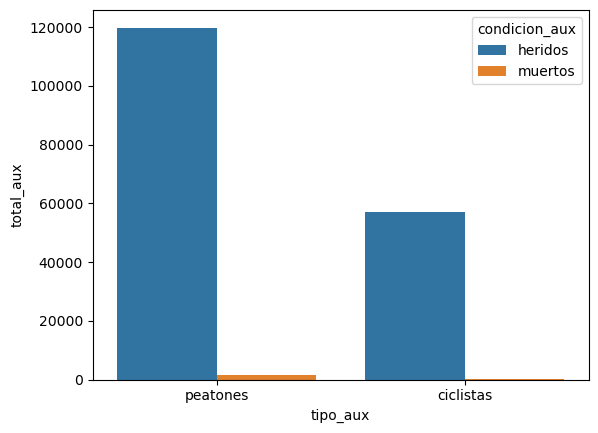

In [178]:
 sns.barplot(x="tipo_aux", y="total_aux", hue="condicion_aux", data=df_aux)

In [179]:
df2_accidentes.periodo_dia.value_counts()

tarde        821069
mañana       618260
noche        399718
madrugada    263048
Name: periodo_dia, dtype: int64

In [180]:
df2_accidentes.hora.value_counts()

16    151001
17    147835
14    139841
15    131314
18    130091
13    120987
8     115449
12    115207
9     111230
11    108347
19    106910
10    103803
20     89364
21     75920
22     69289
0      67957
7      64224
23     58235
6      47035
1      36659
5      30465
4      28110
2      28072
3      24750
Name: hora, dtype: int64

Podemos concluir mediante los graficos que ocurren mas accidentes en Brooklyn seguido por Queens, ademas podemos osbervar que es mayor la cantidad de peatones muertos que motoristas en cambio la cantidad de motoritas heridos es mayor a los peatones.
Podemos conluir tambien que los accidentes en la madrugada ocurren con mayor frecuencia en Brokyln y a las 19 hs ocurren accidentes en todas las localidades.

------------------------------------------------------------------------------

para evaluar los datos con un modelo, se decide clasificarlos y determinar la posibilidad de que le pase algo a un conductor
en los registros se clasificara a los accidentes como "persona afectada" si hubo un muerto o herido.
la variable "persona afectada" sera la variable target del algoritmo o etiqueta

In [182]:
df2_accidentes.sample(10)

CRASH DATE CRASH TIME        BOROUGH ZIP CODE  \
1939044  10/06/2022      14:46       BROOKLYN  11206.0   
1276211  08/28/2015      15:09       BROOKLYN  11205.0   
963988   01/17/2017       5:02       BROOKLYN  11235.0   
382348   08/15/2019      12:40  STATEN ISLAND  10309.0   
2099746  06/25/2024      13:27       BROOKLYN  11235.0   
2031381  06/01/2023       6:40       BROOKLYN  11207.0   
84974    01/28/2022      14:34         QUEENS  11417.0   
357665   09/14/2019      12:30          BRONX  10462.0   
1230718  11/17/2015      14:30       BROOKLYN  11219.0   
1251041  10/23/2015      14:15          BRONX  10470.0   

                           ON STREET NAME                 CROSS STREET NAME  \
1939044                   BUSHWICK AVENUE                    FORREST STREET   
1276211  MYRTLE AVENUE                     WASHINGTON PARK                    
963988   HOMECREST AVENUE                                    WILLIAMS COURT   
382348   BROADWAY                          3 AVENUE                           
2099746                ORIENTAL BOULEVARD                     EXETER STREET   
2031381                      BELT PARKWAY  3 AVENUE                           
84974                 CROSS BAY BOULEVARD                  LINDEN BOULEVARD   
357665   WESTCHESTER AVENUE                                 OLMSTEAD AVENUE   
1230718  65 STREET                         15 AVENUE                          
1251041  EAST 233 STREET                   VAN CORTLANDT PARK EAST            

         NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
1939044                        0.0                       0.0   
1276211                        0.0                       0.0   
963988                         0.0                       0.0   
382348                         0.0                       0.0   
2099746                        3.0                       0.0   
2031381                        1.0                       0.0   
84974                          0.0                       0.0   
357665                         1.0                       0.0   
1230718                        0.0                       0.0   
1251041                        0.0                       0.0   

         NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  \
1939044                              0                             0   
1276211                              0                             0   
963988                               0                             0   
382348                               0                             0   
2099746                              0                             0   
2031381                              0                             0   
84974                                0                             0   
357665                               0                             0   
1230718                              0                             0   
1251041                              0                             0   

         NUMBER OF CYCLIST INJURED  NUMBER OF CYCLIST KILLED  \
1939044                          0                         0   
1276211                          0                         0   
963988                           0                         0   
382348                           0                         0   
2099746                          0                         0   
2031381                          0                         0   
84974                            0                         0   
357665                           0                         0   
1230718                          0                         0   
1251041                          0                         0   

         NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
1939044                           0                          0   
1276211                           0                          0   
963988                            0                          0   
382348                           

In [183]:
mascara = df2_accidentes["NUMBER OF PERSONS INJURED"] >0 
mascara2 = df2_accidentes["NUMBER OF PERSONS KILLED"] >0
indices_paso_algo = df2_accidentes[mascara|mascara2].index
#df3_accidentes = df2_accidentes[[indices_paso_algo,"persona_afectada"]] = 1

In [184]:
df2_accidentes["persona_afectada"]=0
df2_accidentes.loc[indices_paso_algo, "persona_afectada"] = 1

In [185]:
df_arboles = df2_accidentes.copy()

se definen las horas pico para validar si hay mas chance de que una persona se vea afectada en esas horas

In [189]:
mascara = df_arboles["hora"] == 7
mascara2 = df_arboles["hora"] == 8
mascara3 = df_arboles["hora"] == 9
mascara4 = df_arboles["hora"] == 17
mascara5 = df_arboles["hora"] == 18

indices_hora_pico = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5].index

In [190]:
df_arboles["hora_pico"]=0
df_arboles.loc[indices_hora_pico, "hora_pico"] = 1

In [191]:
df_arboles.sample(3)

CRASH DATE CRASH TIME    BOROUGH ZIP CODE  \
974494   12/25/2016      12:46   BROOKLYN  11225.0   
1719162  07/23/2013      22:50  MANHATTAN  10037.0   
620011   07/10/2018      10:01   BROOKLYN  11207.0   

                           ON STREET NAME                 CROSS STREET NAME  \
974494   NOSTRAND AVENUE                                    FENIMORE STREET   
1719162  WEST 139 STREET                   LENOX AVENUE                       
620011   WARREN STREET                                         HICKS STREET   

         NUMBER OF PERSONS INJURED  NUMBER OF PERSONS KILLED  \
974494                         0.0                       0.0   
1719162                        0.0                       0.0   
620011                         0.0                       0.0   

         NUMBER OF PEDESTRIANS INJURED  NUMBER OF PEDESTRIANS KILLED  ...  \
974494                               0                             0  ...   
1719162                              0                             0  ...   
620011                               0                             0  ...   

         NUMBER OF MOTORIST INJURED  NUMBER OF MOTORIST KILLED  \
974494                            0                          0   
1719162                           0                          0   
620011                            0                          0   

         CONTRIBUTING FACTOR VEHICLE 1  CONTRIBUTING FACTOR VEHICLE 2  \
974494             Passing Too Closely            Passing Too Closely   
1719162                    Unspecified                    Unspecified   
620011                     Unspecified                    Unspecified   

        VEHICLE TYPE CODE 1 VEHICLE TYPE CODE 2 hora periodo_dia  \
974494                Sedan               Sedan   12      mañana   
1719162   PASSENGER VEHICLE               Sedan   22       noche   
620011                Sedan               Sedan   10      mañana   

         persona_afectada hora_pico  
974494                  0         0  
1719162                 0         0  
620011                  0         0  

[3 rows x 22 columns]

como los algoritmos de clasificacion requieren de datos numericos, se pasan las variables categoricas a numericas. Se usaron variables Dummys porque no se pudo ejecutar el hotencoder

In [192]:
dummis_ciudad = pd.get_dummies(df_arboles.BOROUGH, drop_first = True)
dummis_ciudad

BROOKLYN  MANHATTAN  QUEENS  STATEN ISLAND
0               1          0       0              0
1               1          0       0              0
2               1          0       0              0
3               1          0       0              0
4               1          0       0              0
...           ...        ...     ...            ...
2102127         1          0       0              0
2102128         1          0       0              0
2102129         1          0       0              0
2102130         0          1       0              0
2102131         1          0       0              0

[2102095 rows x 4 columns]

In [193]:
dummis_periodo_dia = pd.get_dummies(df_arboles.periodo_dia, drop_first = True)
dummis_periodo_dia

mañana  noche  tarde
0             0      0      0
1             1      0      0
2             0      0      0
3             1      0      0
4             1      0      0
...         ...    ...    ...
2102127       0      0      1
2102128       0      0      1
2102129       0      0      0
2102130       0      1      0
2102131       0      0      0

[2102095 rows x 3 columns]

In [194]:
df_arboles["CONTRIBUTING FACTOR VEHICLE 1"].value_counts()

Unspecified                       1821661
Driver Inattention/Distraction      95412
Other Vehicular                     32394
Following Too Closely               19353
Failure to Yield Right-of-Way       17305
                                   ...   
Eating or Drinking                     12
Listening/Using Headphones             12
Windshield Inadequate                   7
1                                       5
Texting                                 3
Name: CONTRIBUTING FACTOR VEHICLE 1, Length: 61, dtype: int64

In [195]:
dummis_motivo1 = pd.get_dummies(df_arboles["CONTRIBUTING FACTOR VEHICLE 1"])
dummis_motivo1.columns

Index(['1', '80', 'Accelerator Defective', 'Aggressive Driving/Road Rage',
       'Alcohol Involvement', 'Animals Action', 'Backing Unsafely',
       'Brakes Defective', 'Cell Phone (hand-Held)', 'Cell Phone (hand-held)',
       'Cell Phone (hands-free)', 'Driver Inattention/Distraction',
       'Driver Inexperience', 'Driverless/Runaway Vehicle', 'Drugs (Illegal)',
       'Drugs (illegal)', 'Eating or Drinking', 'Failure to Keep Right',
       'Failure to Yield Right-of-Way', 'Fatigued/Drowsy', 'Fell Asleep',
       'Following Too Closely', 'Glare', 'Headlights Defective', 'Illnes',
       'Illness', 'Lane Marking Improper/Inadequate',
       'Listening/Using Headphones', 'Lost Consciousness',
       'Obstruction/Debris', 'Other Electronic Device',
       'Other Lighting Defects', 'Other Vehicular', 'Outside Car Distraction',
       'Oversized Vehicle', 'Passenger Distraction', 'Passing Too Closely',
       'Passing or Lane Usage Improper', 'Pavement Defective',
       'Pavement Slipp

In [197]:
df_arboles["factor_auto1"] = "otros"

In [198]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Passenger Distraction'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Animals Action'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Glare'
mascara4 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Other Vehicular'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Outside Car Distraction'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion'
mascara6 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Reaction to Other Uninvolved Vehicle'
mascara7 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Reaction to Uninvolved Vehicle'

indices_externo = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6].index
df_arboles.loc[indices_externo,"factor_auto1"] = "causa o agente ajeno al conductor"

In [199]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Obstruction/Debris'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Pavement Defective'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Pavement Slippery'
mascara4 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Traffic Control Device Improper/Non-Working'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'View Obstructed/Limited'

indices_camino = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6].index
df_arboles.loc[indices_camino,"factor_auto1"] = "falla en el camino"

In [200]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Illnes'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Illness'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Lost Consciousness'
mascara4 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Shoulders Defective/Improper'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Physical Disability'
mascara6 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Prescription Medication'

indices_salud = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6].index
df_arboles.loc[indices_salud,"factor_auto1"] = "enfermedad o evento de salud"

In [201]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Fatigued/Drowsy'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Fell Asleep'

indices_dormido = df_arboles[mascara|mascara2].index
df_arboles.loc[indices_dormido,"factor_auto1"] = "sueño/fatiga"

In [202]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Cell Phone (hand-Held)'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Cell Phone (hand-held)'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Cell Phone (hands-free)'
mascara4 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Listening/Using Headphones'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Other Electronic Device'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Texting'
mascara6 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Using On Board Navigation Device'

indices_celular = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6].index
df_arboles.loc[indices_celular,"factor_auto1"] = "uso de celular o equipo electronico al manejar"

In [203]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Aggressive Driving/Road Rage'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Backing Unsafely'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Driver Inattention/Distraction'
mascara4 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Eating or Drinking'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Following Too Closely'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Passing or Lane Usage Improper'
mascara6 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Traffic Control Disregarded'
mascara7 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Turning Improperly'
mascara8 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Unsafe Lane Changing'
mascara9 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Unsafe Speed'
mascara10 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Tinted Windows'
mascara11 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Oversized Vehicle'

indices_manejo_peligroso = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6|mascara7|mascara8|mascara9|mascara10|mascara11].index
df_arboles.loc[indices_manejo_peligroso,"factor_auto1"] = "conducta peligrosa al manejar"

In [204]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Alcohol Involvement'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Drugs (Illegal)'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Drugs (illegal)'

indices_droga = df_arboles[mascara|mascara2|mascara3].index
df_arboles.loc[indices_droga,"factor_auto1"] = "abuso de sustancias"

In [205]:
mascara = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Accelerator Defective'
mascara2 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Brakes Defective'
mascara3 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Headlights Defective'
mascara4 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Other Lighting Defects'
mascara5 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Tow Hitch Defective'
mascara6 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Steering Failure'
mascara7 = df_arboles["CONTRIBUTING FACTOR VEHICLE 1"] == 'Tire Failure/Inadequate'

indices_mecanica = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5].index
df_arboles.loc[indices_mecanica,"factor_auto1"] = "falla mecanica"

In [206]:
dummis_motivo1 = pd.get_dummies(df_arboles["factor_auto1"])
dummis_motivo1.columns

Index(['abuso de sustancias', 'causa o agente ajeno al conductor',
       'conducta peligrosa al manejar', 'enfermedad o evento de salud',
       'falla en el camino', 'falla mecanica', 'otros', 'sueño/fatiga',
       'uso de celular o equipo electronico al manejar'],
      dtype='object')

Para las variables "ZIP CODE", "ON STREET NAME" y "CROSS STREET NAME" se define si el valor del registro es uno de los 10 con mayor frecuencia para calificarla como "accidente frecuente"

In [214]:
df_arboles["ZIP CODE"].value_counts()[:10]

11207.0    675335
11236.0     15182
11234.0     13843
11203.0     13799
11385.0     13761
11212.0     13726
11208.0     13672
11101.0     13561
11226.0     13066
11434.0     12550
Name: ZIP CODE, dtype: int64

In [217]:
mascara = df_arboles["ZIP CODE"] == 11207
mascara2 = df_arboles["ZIP CODE"] == 11236
mascara3 = df_arboles["ZIP CODE"] == 11234
mascara4 = df_arboles["ZIP CODE"] == 11203
mascara5 = df_arboles["ZIP CODE"] == 11385
mascara6 = df_arboles["ZIP CODE"] == 11212
mascara7 = df_arboles["ZIP CODE"] == 11208
mascara8 = df_arboles["ZIP CODE"] == 11101
mascara9 = df_arboles["ZIP CODE"] == 11226
mascara0 = df_arboles["ZIP CODE"] == 11434   

df_arboles["zp_frecuente"] = 0
indices_zp = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6|mascara7|mascara8|mascara9|mascara0].index
df_arboles.loc[indices_zp,"zp_frecuente"] = 1
df_arboles["zp_frecuente"].value_counts()

0    1303600
1     798495
Name: zp_frecuente, dtype: int64

In [223]:
df_arboles["ON STREET NAME"].value_counts()[:10]

BROADWAY                            465567
ATLANTIC AVENUE                      15322
BELT PARKWAY                         13543
3 AVENUE                             12476
NORTHERN BOULEVARD                   11964
LONG ISLAND EXPRESSWAY                9928
BROOKLYN QUEENS EXPRESSWAY            9743
FLATBUSH AVENUE                       9741
LINDEN BOULEVARD                      9587
QUEENS BOULEVARD                      9368
Name: ON STREET NAME, dtype: int64

In [227]:
df_arboles["ON STREET NAME"] = df_arboles["ON STREET NAME"].apply(lambda x: x.strip())

In [228]:
mascara = df_arboles["ON STREET NAME"] == "BROADWAY"
mascara2 = df_arboles["ON STREET NAME"] == "ATLANTIC AVENUE"
mascara3 = df_arboles["ON STREET NAME"] == "BELT PARKWAY"
mascara4 = df_arboles["ON STREET NAME"] == "3 AVENUE"
mascara5 = df_arboles["ON STREET NAME"] == "NORTHERN BOULEVARD"
mascara6 = df_arboles["ON STREET NAME"] == "LONG ISLAND EXPRESSWAY"
mascara7 = df_arboles["ON STREET NAME"] == "BROOKLYN QUEENS EXPRESSWAY"
mascara8 = df_arboles["ON STREET NAME"] == "FLATBUSH AVENUE"
mascara9 = df_arboles["ON STREET NAME"] == "LINDEN BOULEVARD"
mascara0 = df_arboles["ON STREET NAME"] == "QUEENS BOULEVARD"   

df_arboles["sn_frecuente"] = 0
indices_sn = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6|mascara7|mascara8|mascara9|mascara0].index
df_arboles.loc[indices_sn,"sn_frecuente"] = 1
df_arboles["sn_frecuente"].value_counts()

0    1511555
1     590540
Name: sn_frecuente, dtype: int64

In [230]:
df_arboles["CROSS STREET NAME"] = df_arboles["CROSS STREET NAME"].apply(lambda x: x.strip())

In [231]:
df_arboles["CROSS STREET NAME"].value_counts()[:10]

3 AVENUE            814829
BROADWAY             16149
2 AVENUE             13549
5 AVENUE             10885
7 AVENUE             10124
8 AVENUE              9839
1 AVENUE              8764
PARK AVENUE           8227
LEXINGTON AVENUE      6745
LINDEN BOULEVARD      6136
Name: CROSS STREET NAME, dtype: int64

In [232]:
mascara = df_arboles["ON STREET NAME"] == "3 AVENUE"
mascara2 = df_arboles["ON STREET NAME"] == "BROADWAY"
mascara3 = df_arboles["ON STREET NAME"] == "2 AVENUE"
mascara4 = df_arboles["ON STREET NAME"] == "5 AVENUE"
mascara5 = df_arboles["ON STREET NAME"] == "7 AVENUE"
mascara6 = df_arboles["ON STREET NAME"] == "8 AVENUE"
mascara7 = df_arboles["ON STREET NAME"] == "1 AVENUE"
mascara8 = df_arboles["ON STREET NAME"] == "PARK AVENUE"
mascara9 = df_arboles["ON STREET NAME"] == "LEXINGTON AVENUE"
mascara0 = df_arboles["ON STREET NAME"] == "LINDEN BOULEVARD"   

df_arboles["cs_frecuente"] = 0
indices_cs = df_arboles[mascara|mascara2|mascara3|mascara4|mascara5|mascara6|mascara7|mascara8|mascara9|mascara0].index
df_arboles.loc[indices_cs,"cs_frecuente"] = 1
df_arboles["cs_frecuente"].value_counts()

0    1559601
1     542494
Name: cs_frecuente, dtype: int64

In [234]:
df_arboles
df_arboles2 = df_arboles.loc[:,["persona_afectada","hora_pico","zp_frecuente","sn_frecuente","cs_frecuente"]]
df_arboles2

persona_afectada  hora_pico  zp_frecuente  sn_frecuente  cs_frecuente
0                       1          0             1             0             0
1                       1          0             1             0             0
2                       0          0             1             0             0
3                       0          1             1             1             1
4                       0          1             0             0             0
...                   ...        ...           ...           ...           ...
2102127                 0          0             1             1             1
2102128                 0          0             1             1             1
2102129                 0          0             0             1             1
2102130                 1          0             0             0             0
2102131                 1          0             0             0             0

[2102095 rows x 5 columns]

In [235]:
df_arboles3 = pd.concat([df_arboles2, dummis_motivo1, dummis_periodo_dia,dummis_ciudad], axis=1)
df_arboles3

persona_afectada  hora_pico  zp_frecuente  sn_frecuente  \
0                       1          0             1             0   
1                       1          0             1             0   
2                       0          0             1             0   
3                       0          1             1             1   
4                       0          1             0             0   
...                   ...        ...           ...           ...   
2102127                 0          0             1             1   
2102128                 0          0             1             1   
2102129                 0          0             0             1   
2102130                 1          0             0             0   
2102131                 1          0             0             0   

         cs_frecuente  abuso de sustancias  causa o agente ajeno al conductor  \
0                   0                    0                                  0   
1                   0                    0                                  0   
2                   0                    0                                  0   
3                   1                    0                                  0   
4                   0                    0                                  0   
...               ...                  ...                                ...   
2102127             1                    0                                  0   
2102128             1                    0                                  0   
2102129             1                    0                                  0   
2102130             0                    0                                  0   
2102131             0                    0                                  0   

         conducta peligrosa al manejar  enfermedad o evento de salud  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
2102127                              0                             0   
2102128                              0                             0   
2102129                              0                             0   
2102130                              0                             0   
2102131                              0                             0   

         falla en el camino  ...  otros  sueño/fatiga  \
0                         0  ...      1             0   
1                         0  ...      1             0   
2                         0  ...      1             0   
3                         0  ...      1             0   
4                         0  ...      1             0   
...                     ...  ...    ...           ...   
2102127                   0  ...      1             0   
2102128                   0  ...      1             0   
2102129                   0  ...      1             0   
2102130                   0  ...      1             0   
2102131                   0  ...      1             0   

         uso de celular o equipo electronico al manejar  mañana  noche  tarde  \
0                                                     0       0      0      0   
1                                                     0       1      0      0   
2                                                     0       0      0      0   
3                                                     0       1      0      0   
4                                                     0       1      0      0   
...                                                 ...     ...    ...    ...   
2102127                                               0       0      0      1   
2102128              

In [236]:
df_arboles3=df_arboles3.drop("otros",axis=1)
df_arboles3

persona_afectada  hora_pico  zp_frecuente  sn_frecuente  \
0                       1          0             1             0   
1                       1          0             1             0   
2                       0          0             1             0   
3                       0          1             1             1   
4                       0          1             0             0   
...                   ...        ...           ...           ...   
2102127                 0          0             1             1   
2102128                 0          0             1             1   
2102129                 0          0             0             1   
2102130                 1          0             0             0   
2102131                 1          0             0             0   

         cs_frecuente  abuso de sustancias  causa o agente ajeno al conductor  \
0                   0                    0                                  0   
1                   0                    0                                  0   
2                   0                    0                                  0   
3                   1                    0                                  0   
4                   0                    0                                  0   
...               ...                  ...                                ...   
2102127             1                    0                                  0   
2102128             1                    0                                  0   
2102129             1                    0                                  0   
2102130             0                    0                                  0   
2102131             0                    0                                  0   

         conducta peligrosa al manejar  enfermedad o evento de salud  \
0                                    0                             0   
1                                    0                             0   
2                                    0                             0   
3                                    0                             0   
4                                    0                             0   
...                                ...                           ...   
2102127                              0                             0   
2102128                              0                             0   
2102129                              0                             0   
2102130                              0                             0   
2102131                              0                             0   

         falla en el camino  falla mecanica  sueño/fatiga  \
0                         0               0             0   
1                         0               0             0   
2                         0               0             0   
3                         0               0             0   
4                         0               0             0   
...                     ...             ...           ...   
2102127                   0               0             0   
2102128                   0               0             0   
2102129                   0               0             0   
2102130                   0               0             0   
2102131                   0               0             0   

         uso de celular o equipo electronico al manejar  mañana  noche  tarde  \
0                                                     0       0      0      0   
1                                                     0       1      0      0   
2                                                     0       0      0      0   
3                                                     0       1      0      0   
4                                                     0       1      0      0   
...                                                 ...     ...    ...    ...   
2102127                                               

se implementa el algoritmo DecisionTreeClassifier

In [292]:
df_arboles3["persona_afectada"].value_counts()

0    1614009
1     488086
Name: persona_afectada, dtype: int64

In [239]:
X = df_arboles3.drop("persona_afectada",axis=1)
y = df_arboles3["persona_afectada"]

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100, stratify=y)

In [313]:
modelo = DecisionTreeClassifier(random_state=1, max_depth= 10)
modelo.fit(X_train, y_train)
preds = modelo.predict(X_test) 

In [314]:
X.columns

Index(['hora_pico', 'zp_frecuente', 'sn_frecuente', 'cs_frecuente',
       'abuso de sustancias', 'causa o agente ajeno al conductor',
       'conducta peligrosa al manejar', 'enfermedad o evento de salud',
       'falla en el camino', 'falla mecanica', 'sueño/fatiga',
       'uso de celular o equipo electronico al manejar', 'mañana', 'noche',
       'tarde', 'BROOKLYN', 'MANHATTAN', 'QUEENS', 'STATEN ISLAND'],
      dtype='object')

In [315]:
y.values

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [316]:
target_names = ["0","1"]
target_names

['0', '1']

In [317]:
# Graficando
fig = plt.figure(figsize=(300,40))
_ = tree.plot_tree(clf,feature_names=X.columns,  
                   class_names=target_names,
                   filled=True, fontsize=40)
fig.savefig("arbol.png")

C:\Users\Piero Nicolas\Documents\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


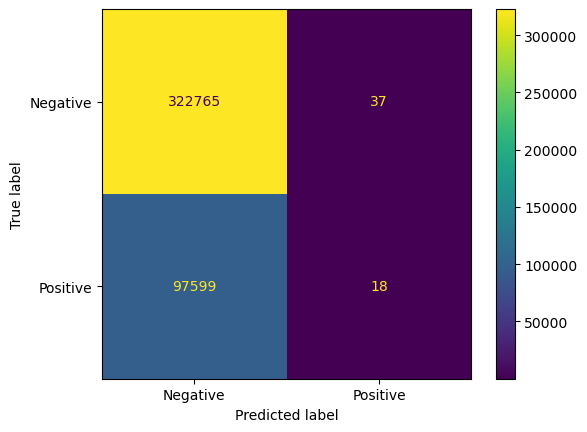

In [318]:
metrics.plot_confusion_matrix(modelo, X_test, y_test, display_labels=['Negative', 'Positive'])

In [319]:
accuracy = metrics.accuracy_score(y_test, preds)
accuracy 

0.7677650153775163

In [320]:
precision_positiva = metrics.precision_score(y_test, preds, pos_label=1)
precision_negativa = metrics.precision_score(y_test, preds, pos_label=0)
precision_positiva, precision_negativa 

(0.32727272727272727, 0.7678226489423452)

In [321]:
recall_sensibilidad = metrics.recall_score(y_test, preds, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, preds, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.00018439411168136698, 0.9998853786531682)

Conclusion
Con las variable target y los datos que se tiene, el modelo tienda a clasificar la mayoria de los datos como negativos, haciendo overfitting.Pero tiene una especificidad muy alta, por lo que si el modelo indica que es seguro manejar ya que no tengo chances de que ocurra algo, es muy posible que la prediccion sea correcta.